### Introduction

This project aims to take NFL football plays with over 50 available features and determine which factors lead to more victories. To do this first, I need to clean the dataset by removing any unnecessary data. Following I'll need to clean up the data some more going through the features, this may include one hot encoding certain columns to provide numeric values as well as removing features deeming too informative for the model as well as features that provide little to no information.

After the data is cleaned, I will condense the data from a play-by-play dataset to a game-by-game dataset. This will be important for a number of reasons:

    1: Run time Plays do not exist in isolation
        -o look at individual plays without context to those around them can be misleading, to avoid this the plays will be     looked at with all others in each game to better inform the models. 
    
    2:  More digestible data
        -Viewing a dataframe of a bunch of plays doesn't paint a very clear picture of the data. Being able to view the data in a game-by-game basis makes it much clearer to view the data. This can be important for modeling, helping create visuals or spot errors in the data.
    
    3: Run time
        -Reducing the size of the dataset drastically, without losing any information, will allow for much more refined         gridsearches and extensive modeling in far less time.
        
After all of this, models will be ran on the remaining data to determine what input statistics are most influential to winning football games.

## Data Dictionary

item{play_id} - Numeric play id that when used with game_id and drive provides the unique identifier for a single play.

{game_id} - Ten digit identifier for NFL game.

{home_team} - String abbreviation for the home team.

{away_team} - String abbreviation for the away team.

{posteam} - String abbreviation for the team with possession.

{posteam_type} - String indicating whether the posteam team is home or away.

{yardline_100} - Numeric distance in the number of yards from the opponent's endzone for the posteam.

{game_seconds_remaining} - Numeric seconds remaining in the game.

{game_half} - String indicating which half the play is in, either Half1, Half2, or Overtime.

{drive} - Numeric drive number in the game.

{sp} - Binary indicator for whether or not a score occurred on the play.

{qtr} - Quarter of the game (5 is overtime).

{down} - The down for the given play.

{goal_to_go} - Binary indicator for whether or not the posteam is in a goal down situation.

{time} - Time at start of play provided in string format as minutes:seconds remaining in the quarter.

{yrdln} - String indicating the current field position for a given play.

{ydstogo} - Numeric yards in distance from either the first down marker or the endzone in goal down situations.

{ydsnet} - Numeric value for total yards gained on the given drive.

{desc} - Detailed string description for the given play.

{play_type} - String indicating the type of play: pass (includes sacks), 
  run (includes scrambles), punt, field_goal, kickoff, extra_point, 
  qb_kneel, qb_spike, no_play (timeouts and penalties), and missing for rows indicating end of play.

{yards_gained} - Numeric yards gained (or lost) for the given play.

{shotgun} - Binary indicator for whether or not the play was in shotgun formation.

{no_huddle} - Binary indicator for whether or not the play was in no_huddle formation.

{qb_dropback} - Binary indicator for whether or not the QB dropped back on the play (pass attempt, sack, or scrambled).

{qb_kneel} - Binary indicator for whether or not the QB took a knee.

{qb_spike} - Binary indicator for whether or not the QB spiked the ball.

{qb_scramble} - Binary indicator for whether or not the QB scrambled.

{pass_length} - String indicator for pass length: short or deep.

{pass_location} - String indicator for pass location: left, middle, or right.

{air_yards} - Numeric value for distance in yards perpendicular to the line 
  of scrimmage at where the targeted receiver either caught or didn't catch the ball.
  
{yards_after_catch} - Numeric value for distance in yards perpendicular to 
  the yard line where the receiver made the reception to where the play ended.
  
{run_location} - String indicator for location of run: left, middle, or right.

{run_gap} - String indicator for line gap of run: end, guard, or tackle

{field_goal_result} - String indicator for result of field goal attempt: made, missed, or blocked.

{two_point_conv_result} - String indicator for result of two point conversion
  attempt: success, failure, safety (touchback in defensive endzone is 1 point 
  apparently), or return.
  
{td_team} - String abbreviation for which team scored the touchdown.

{total_home_score} - Score for the home team at the start of the play.

{total_away_score} - Score for the away team at the start of the play.

{first_down_rush} - Binary indicator for if a running play converted the first down.

{first_down_pass} - Binary indicator for if a passing play converted the first down.

{first_down_penalty} - Binary indicator for if a penalty converted the first down.

{third_down_converted} - Binary indicator for if the first down was converted on third down.

{third_down_failed} - Binary indicator for if the posteam failed to convert first down on third down.

{fourth_down_converted} - Binary indicator for if the first down was converted on fourth down.

{fourth_down_failed} - Binary indicator for if the posteam failed to convert first down on fourth down.

{incomplete_pass} - Binary indicator for if the pass was incomplete.

{interception} - Binary indicator for if the pass was intercepted.

{solo_tackle} - Binary indicator if the play had a solo tackle (could be multiple due to fumbles).

{safety} - Binary indicator for whether or not a safety occurred.

{tackled_for_loss} - Binary indicator for whether or not a tackle for loss occurred.

{qb_hit} - Binary indicator if the QB was hit on the play.

{rush_attempt} - Binary indicator for if the play was a run.

{pass_attempt} - Binary indicator for if the play was a pass attempt (includes sacks).

{sack} - Binary indicator for if the play ended in a sack.

{touchdown} - Binary indicator for if the play resulted in a TD.

{fumble} - Binary indicator for if a fumble occurred.

{complete_pass} - Binary indicator for if the pass was completed.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 155)
pd.set_option('display.max_rows', 150)

Importing numpy and pandas for data manipulation.

Importing matplotlib and seaborn for graphing.

Also setting the max rows and columns to larger values, due to the large size of the data frames to get a better grasp of the data.

In [117]:
df = pd.read_csv('C:/Users/ps3ma/Capstone/Capstone_final - Copy/Actual_Capstone/nflData_cleaned2.csv')
df.tail(50)

# Setting up the dataframe object pulling play data from a CSV,
# looking at 50 values in order to make sure it covers multiple
# games to account for anything out of the ordinary.

,play_id,game_id,home_team,away_team,posteam,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_scramble,pass_location,air_yards,yards_after_catch,run_location,run_gap,td_team,total_home_score,total_away_score,score_differential,score_differential_post,first_down_rush,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,fumble_forced,solo_tackle,safety,tackled_for_loss,fumble_lost,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,punt_attempt,fumble
449321,2974,2018121700,CAR,NO,NO,73.0,12/17/2018,130.0,1030.0,1030.0,Half2,0,17,0,3,1.0,0.0,2:10:00,NO 27,(2:10) D.Brees sacked at NO 19 for -8 yards (s...,pass,-8.0,0,0,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7,6,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
449322,2994,2018121700,CAR,NO,NO,81.0,12/17/2018,84.0,984.0,984.0,Half2,0,17,0,3,2.0,0.0,1:24:00,NO 19,(1:24) (Shotgun) D.Brees pass incomplete deep ...,no_play,0.0,1,0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,7,6,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449323,3027,2018121700,CAR,NO,NO,63.0,12/17/2018,78.0,978.0,978.0,Half2,0,17,0,3,1.0,0.0,1:18:00,NO 37,(1:18) (Shotgun) D.Brees pass short left to A....,pass,9.0,1,0,1.0,0,left,4.0,5.0,NaN,NaN,NaN,7,6,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
449324,3052,2018121700,CAR,NO,NO,54.0,12/17/2018,55.0,955.0,955.0,Half2,0,17,0,3,2.0,0.0,0:55:00,NO 46,(:55) Z.Line up the middle to NO 47 for 1 yard...,run,1.0,0,0,0.0,0,NaN,NaN,NaN,middle,NaN,NaN,7,6,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449325,3074,2018121700,CAR,NO,NO,53.0,12/17/2018,19.0,919.0,919.0,Half2,0,17,0,3,1.0,0.0,0:19:00,NO 47,(:19) A.Kamara right end to NO 46 for -1 yards...,run,-1.0,0,0,0.0,0,NaN,NaN,NaN,right,end,NaN,7,6,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449326,3096,2018121700,CAR,NO,NaN,NaN,12/17/2018,0.0,900.0,900.0,Half2,1,17,0,3,NaN,NaN,0:00:00,NO 47,END QUARTER 3,NaN,0.0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,7,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
449327,3113,2018121700,CAR,NO,NO,54.0,12/17/2018,900.0,900.0,900.0,Half2,0,17,0,4,2.0,0.0,15:00:00,NO 46,(15:00) (Shotgun) D.Brees pass short left to M...,pass,12.0,1,0,1.0,0,left,4.0,8.0,NaN,NaN,NaN,7,6,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
449328,3145,2018121700,CAR,NO,NO,42.0,12/17/2018,865.0,865.0,865.0,Half2,0,17,0,4,1.0,0.0,14:25:00,CAR 42,(14:25) (Shotgun) D.Brees pass short left to M...,pass,2.0,1,0,1.0,0,left,2.0,0.0,NaN,NaN,NaN,7,6,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
449329,3170,2018121700,CAR,NO,NO,40.0,12/17/2018,823.0,823.0,823.0,Half2,0,17,0,4,2.0,0.0,13:43:00,CAR 40,(13:43) (Shotgun) T.Hill left end to CAR 23 fo...,run,17.0,1,0,0.0,0,NaN,NaN,NaN,left,end,NaN,7,6,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
449330,3192,2018121700,CAR,NO,NO,23.0,12/17/2018,781.0,781.0,781.0,Half2,0,17,0,4,1.0,0.0,13:01:00,CAR 23,(13:01) W.Clapp reported in as eligible. M.In...,run,7.0,0,0,0.0,0,NaN,NaN,NaN,right,tackle,NaN,7,6,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449371 entries, 0 to 449370
Data columns (total 58 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   play_id                    449371 non-null  int64  
 1   game_id                    449371 non-null  int64  
 2   home_team                  449371 non-null  object 
 3   away_team                  449371 non-null  object 
 4   posteam                    436129 non-null  object 
 5   yardline_100               436301 non-null  float64
 6   game_date                  449371 non-null  object 
 7   quarter_seconds_remaining  449230 non-null  float64
 8   half_seconds_remaining     449206 non-null  float64
 9   game_seconds_remaining     449208 non-null  float64
 10  game_half                  449371 non-null  object 
 11  quarter_end                449371 non-null  int64  
 12  drive                      449371 non-null  int64  
 13  sp                         44

Will need to do more to check for null values.

In [119]:
df.isna().sum()

play_id                           0
game_id                           0
home_team                         0
away_team                         0
posteam                       13242
yardline_100                  13070
game_date                         0
quarter_seconds_remaining       141
half_seconds_remaining          165
game_seconds_remaining          163
game_half                         0
quarter_end                       0
drive                             0
sp                                0
qtr                               0
down                          67962
goal_to_go                    12707
time                            141
yrdln                           600
desc                              2
play_type                     12874
yards_gained                    213
shotgun                           0
no_huddle                         0
qb_dropback                   12874
qb_scramble                       0
pass_location                274656
air_yards                   

Most NaN columns will be able to be dropped. A large portion of them are from non-plays which arent needed for analysis or from irrelavent columns that will be dropped anyways. As we'll see in the next few line of code, certain entries will be dropped for qb spikes, kneels, extra points, kickoffs and any play where the description is set to NaN. Each of these do not factor into decision making (since in most cases these plays are mandatory when they are being called) which can potentially lead to a mislead model.

A few others will remain, but will be dealt with later

------------

## Cleaning the Data

#### Dealing with problematic data by row

In [120]:
x = df['posteam'].dropna(inplace=True)

# Initially was going to be used to drop any row where there was no team with possession. This in theory drops all 'non-plays' 
# However, this was ultimately not used.

In [121]:
df_test = df.drop(df[df['play_type']=='qb_spike'].index)
df_test2 = df_test.drop(df[df['play_type']=='qb_kneel'].index)
df_test3 = df_test2.drop(df[df['play_type']=='extra_point'].index)
df_test4 = df_test3.drop(df[df['play_type']=='kickoff'].index)
df_cleaned = df_test4.drop(df[df['desc']=='NaN'].index)

Dropping rows where non-plays or unimportant plays occured skewing data and creating NaN values.
This was done feature by feature due to quite a bit of iteration as the project progressed, leaving these plays as the final plays that were dropped. QB spikes, kneels, extra points and kickoffs are all irrelavent plays for this study so they were dropped.

Finally dropping plays that had NaN as the descriptor drops all the 'non-plays' from the data frame.

In [122]:
df_cleaned['is_over'] = np.where(df_cleaned['desc'] == 'END GAME', 1, 0)

Creating a marker to note where the last play of every game is. This is later used to condense the data down to games as opposed to plays.

In [123]:
df_cleaned = df_cleaned.drop(columns = ['game_date','yrdln','time','td_team'])

Removing extra features that are not needed to reduce total computations.

-----

In [124]:
df_cleaned.duplicated().sum()

2145

Duplicate values remain, more cleaning is required

In [12]:
df['game_id'].nunique()

2526

The data, now that it has been cleaned, needs to be reduced to a per game scale. This is done for multiple reasons.
The 1st of which is to reduce run time. The 2nd is to compare features to the outcome of a game, which is much more practical.

### Creating a new feature '+ drives' to denote wether an individual drive or set of cuncurrent plays by one team was successful or lead to a failure

In [13]:
df_cleaned['+ drive'] = np.where(((df_cleaned['play_type'] == 'field_goal') | (df_cleaned['touchdown'])) == 1.0, 1, 0)

Creating new column to indicate drives that lead to a score. If a touchdown was scored this column will contain a 1, likewise if a field goal is attempted this column with contain a 1. In this case an attempt is just as valuable as it put the team in scoring position and whether the field goal was made or missed is irrelavent. 

Any unsuccessful drive this column will display a 0.

-------

In [14]:
df_cleaned.reset_index(inplace=True)

# Resetting index, ran into issues initially attempting to run the final computation of this function
# with the current index starting at 0, so I reset the index to solve this issue

In [15]:
df_cleaned['new_index'] = (df_cleaned.index) + 1
# Adding 1 to the index so it starts at 1 instead of 0. This allows the loop that will be ran to remain in index.

In [16]:
df_cleaned.set_index('new_index')

,index,play_id,game_id,home_team,away_team,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_scramble,pass_location,air_yards,yards_after_catch,run_location,run_gap,total_home_score,total_away_score,score_differential,score_differential_post,first_down_rush,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,fumble_forced,solo_tackle,safety,tackled_for_loss,fumble_lost,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,punt_attempt,fumble,is_over,+ drive
new_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,68,2009091000,PIT,TEN,PIT,58.0,893.0,1793.0,3593.0,Half1,0,1,0,1,1.0,0.0,(14:53) B.Roethlisberger pass short left to H....,pass,5.0,0,0,1.0,0,left,-3.0,8.0,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,2,92,2009091000,PIT,TEN,PIT,53.0,856.0,1756.0,3556.0,Half1,0,1,0,1,2.0,0.0,(14:16) W.Parker right end to PIT 44 for -3 ya...,run,-3.0,0,0,0.0,0,NaN,NaN,NaN,right,end,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,3,113,2009091000,PIT,TEN,PIT,56.0,815.0,1715.0,3515.0,Half1,0,1,0,1,3.0,0.0,(13:35) (Shotgun) B.Roethlisberger pass incomp...,pass,0.0,1,0,1.0,0,right,34.0,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,4,139,2009091000,PIT,TEN,PIT,56.0,807.0,1707.0,3507.0,Half1,0,1,0,1,4.0,0.0,(13:27) (Punt formation) D.Sepulveda punts 54 ...,punt,0.0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
5,5,162,2009091000,PIT,TEN,TEN,98.0,796.0,1696.0,3496.0,Half1,0,2,0,1,1.0,0.0,(13:16) C.Johnson up the middle to TEN 2 for n...,run,0.0,0,0,0.0,0,NaN,NaN,NaN,middle,NaN,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408361,449364,4002,2018121700,CAR,NO,CAR,71.0,77.0,77.0,77.0,Half2,0,20,0,4,3.0,0.0,(1:17) (Shotgun) C.Newton pass short middle to...,pass,5.0,1,0,1.0,0,middle,2.0,3.0,NaN,NaN,7,12,-5.0,-5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
408362,449366,4059,2018121700,CAR,NO,CAR,66.0,63.0,63.0,63.0,Half2,0,20,0,4,2.0,0.0,(1:03) (Shotgun) C.Newton pass incomplete shor...,pass,0.0,1,0,1.0,0,middle,12.0,NaN,NaN,NaN,7,12,-5.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
408363,449367,4081,2018121700,CAR,NO,CAR,66.0,58.0,58.0,58.0,Half2,0,20,0,4,3.0,0.0,(:58) (Shotgun) C.Newton pass short middle to ...,pass,5.0,1,0,1.0,0,middle,2.0,3.0,NaN,NaN,7,12,-5.0,-5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [17]:
df_cleaned.drop('index', axis = 1, inplace = True)

# Since there are now 2 index columns, 1 is being dropped.

index adjusted to properly run the following while loop

In [18]:
index =df_cleaned.shape[0] -1
while index > 0:
    curr_drive = df_cleaned.loc[index,'drive']
    curr_team = df_cleaned.loc[index,'posteam']
#     print(curr_drive)
#     print(curr_team)
    if df_cleaned.loc[index,'+ drive'] == 1:
        while df_cleaned.loc[index,'drive'] == curr_drive:
            df_cleaned.loc[index,'+ drive'] = 1
            index-=1
    else:
        index-=1
        


Running a while loop on the data frame backwards. By creating a variable 'index' set to the total features remaining, a while loop can count backwards until there are no plays left.

This loop prints the current drive and current team on a given play, which is commented out for clarity. This is done not to communicate anything but rather to make debugging easier if there happens to be an error. 

This while loop goes backwards through the plays, to easily see the last play of every drive. If the last play in a drive is a scoring play, the '+ drive' column for every play that occurs during that drive will be updated to a 1. 

This ultimately isn't used due to a rescoping of the project but could be used later for further analyis on a per drive basis which is why it was kept.

In [19]:
df_cleaned['game_half'] = np.where(df_cleaned['game_half'] == 'Half1', 1, 2)

# Converting Game-half into a numeric column

In [ ]:
df_cleaned.duplicated().sum()

After further cleaning there are no remaining duplicates

In [20]:
df_cleaned.tail(10)

,play_id,game_id,home_team,away_team,posteam,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_scramble,pass_location,air_yards,yards_after_catch,run_location,run_gap,total_home_score,total_away_score,score_differential,score_differential_post,first_down_rush,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,interception,fumble_forced,solo_tackle,safety,tackled_for_loss,fumble_lost,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,punt_attempt,fumble,is_over,+ drive,new_index
408355,3865,2018121700,CAR,NO,NO,8.0,115.0,115.0,115.0,2,0,19,0,4,2.0,0.0,(1:55) (Shotgun) A.Kamara up the middle to CAR...,run,3.0,1,0,0.0,0,NaN,NaN,NaN,middle,NaN,7,12,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,408356
408356,3887,2018121700,CAR,NO,NO,8.0,111.0,111.0,111.0,2,0,19,0,4,NaN,0.0,Timeout #3 by CAR at 01:51.,no_play,0.0,0,0,0.0,0,NaN,NaN,NaN,NaN,NaN,7,12,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,408357
408357,3904,2018121700,CAR,NO,NO,5.0,111.0,111.0,111.0,2,0,19,0,4,3.0,0.0,(1:51) T.Lewis right end to CAR 1 for 4 yards ...,run,4.0,0,0,0.0,0,NaN,NaN,NaN,right,end,7,12,5.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,408358
408358,3949,2018121700,CAR,NO,CAR,80.0,104.0,104.0,104.0,2,0,20,0,4,1.0,0.0,(1:44) (Shotgun) C.Newton pass short right to ...,pass,9.0,1,0,1.0,0,right,-1.0,10.0,NaN,NaN,7,12,-5.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,408359
408359,3980,2018121700,CAR,NO,CAR,71.0,82.0,82.0,82.0,2,0,20,0,4,2.0,0.0,"(1:22) (No Huddle, Shotgun) C.Newton pass inco...",pass,0.0,1,1,1.0,0,right,11.0,NaN,NaN,NaN,7,12,-5.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,408360
408360,4002,2018121700,CAR,NO,CAR,71.0,77.0,77.0,77.0,2,0,20,0,4,3.0,0.0,(1:17) (Shotgun) C.Newton pass short middle to...,pass,5.0,1,0,1.0,0,middle,2.0,3.0,NaN,NaN,7,12,-5.0,-5.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,408361
408361,4059,2018121700,CAR,NO,CAR,66.0,63.0,63.0,63.0,2,0,20,0,4,2.0,0.0,(1:03) (Shotgun) C.Newton pass incomplete shor...,pass,0.0,1,0,1.0,0,middle,12.0,NaN,NaN,NaN,7,12,-5.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,408362
408362,4081,2018121700,CAR,NO,CAR,66.0,58.0,58.0,58.0,2,0,20,0,4,3.0,0.0,(:58) (Shotgun) C.Newton pass short middle to ...,pass,5.0,1,0,1.0,0,middle,2.0,3.0,NaN,NaN,7,12,-5.0,-5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,408363
408363,4106,2018121700,CAR,NO,CAR,61.0,38.0,38.0,38.0,2,0,20,0,4,4.0,0.0,"(:38) (No Huddle, Shotgun) C.Newton pass incom...",pass,0.0,1,1,1.0,0,right,4.0,NaN,NaN,NaN,7,12,-5.0,-5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,408364
408364,4150,2018121700,CAR,NO,NaN,NaN,0.0,0.0,0.0,2,1,21,0,4,NaN,NaN,END GAME,NaN,0.0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,7,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,408365


---------

### Separating into a new data frame for easier follow up adjustments

In order to prevent running large while loops every time the dataframe needs to be updated, a new dataframe is made the expedite this process.

In [21]:
end_scores_df = df_cleaned

In [22]:
ohe  = pd.get_dummies(end_scores_df['play_type'])
ohe2 = pd.get_dummies(end_scores_df['pass_location'])
ohe3 = pd.get_dummies(end_scores_df['run_gap'])

one hot encoding multicategorical columns that may provide insight for the model.

In [23]:
end_scores_df = pd.conacccat([end_scores_df,ohe],  axis =1)
end_scores_df = pd.concat([end_scores_df,ohe2], axis =1)
end_scores_df = pd.concat([end_scores_df,ohe3], axis =1)


end_scores_df = end_scores_df.drop(columns = ['play_type', 'play_id', 'yardline_100',
                                              'quarter_seconds_remaining', 'half_seconds_remaining',
                                              'game_half', 'quarter_end', 'drive' ,'sp', 'qtr', 
                                              'down', 'goal_to_go', 'desc', 'yards_gained', 'pass_location',
                                              'air_yards', 'yards_after_catch', 'run_location','run_gap',
                                              'score_differential_post', 'solo_tackle', 'safety','tackled_for_loss',
                                              'qb_hit', 'sack', 'touchdown', 'pass_touchdown', 'rush_touchdown',
                                              'punt_attempt', '+ drive','game_seconds_remaining','no_play','new_index',
                                              'score_differential','interception', 'incomplete_pass', 'fumble_forced',
                                             'fumble_lost', 'fumble'])

Adding the one hot encoded data points to the base data frame.

Dropping columns deemed irrelavent or too informative. Columns like play_id and drive indicate nothing towards the outcome of games and columns such as touchdown and fumble aren't directly in our control. Dropping these columns that arent needed for the models will reduce the runtime going forward.

For now the extra one hot encoded column will remain for later visualizations, but they will be dropped by the end.

In [24]:
end_scores_df.tail()

,game_id,home_team,away_team,posteam,shotgun,no_huddle,qb_dropback,qb_scramble,total_home_score,total_away_score,first_down_rush,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,rush_attempt,pass_attempt,is_over,field_goal,pass,punt,run,left,middle,right,end,guard,tackle
408360,2018121700,CAR,NO,CAR,1,0,1.0,0,7,12,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0
408361,2018121700,CAR,NO,CAR,1,0,1.0,0,7,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0
408362,2018121700,CAR,NO,CAR,1,0,1.0,0,7,12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0
408363,2018121700,CAR,NO,CAR,1,1,1.0,0,7,12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,0,0,0,0,1,0,0,0
408364,2018121700,CAR,NO,NaN,0,0,NaN,0,7,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0


------------

If no action is taken, when the data is grouped by game the total score column will be the sum of the score during every play in the game. In order to prevent that, I must keep the score of every game at the end of the game and set all other values to 0.

In [25]:
index =end_scores_df.shape[0] -1
while index > 0:
    curr_game = end_scores_df.loc[index,'game_id']
#     print(curr_game)
    if end_scores_df.loc[index,'is_over'] == 1:
        while end_scores_df.loc[index,'game_id'] == curr_game:
            if end_scores_df.loc[index,'is_over'] == 1:
                index-=1
            else:
                end_scores_df.loc[index,'total_home_score'] = 0
                end_scores_df.loc[index,'total_away_score'] = 0
                index-=1
    else:
        index-=1

This loop prints the game id which is commented out for clarity. This is done not to communicate anything but rather to make debugging easier if there happens to be an error. 

This loop runs backwards through the entire data set searching for the end play of a game and then sets all other scores to zero if the current play is not the last play of a game.

This is so when grouped at a per game level. The score will show the final score and not the sum of all the scores at every given point during a game.

In [26]:
end_scores_df.tail()

,game_id,home_team,away_team,posteam,shotgun,no_huddle,qb_dropback,qb_scramble,total_home_score,total_away_score,first_down_rush,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,rush_attempt,pass_attempt,is_over,field_goal,pass,punt,run,left,middle,right,end,guard,tackle
408360,2018121700,CAR,NO,CAR,1,0,1.0,0,0,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0
408361,2018121700,CAR,NO,CAR,1,0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0
408362,2018121700,CAR,NO,CAR,1,0,1.0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,1,0,0,0,0
408363,2018121700,CAR,NO,CAR,1,1,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,1,0,0,0,0,1,0,0,0
408364,2018121700,CAR,NO,NaN,0,0,NaN,0,7,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0


In [27]:
end_scores_df1 = end_scores_df

# Creating another new dataframe to prevent needing to run that while loop again due to computation time.

---------

## Declaring the Winning team's plays and losing team's plays

In [28]:
end_scores_df1['home_win'] = np.where(end_scores_df1['total_home_score'] > end_scores_df1['total_away_score'], 1, 0)
end_scores_df1['away_win'] = np.where(end_scores_df1['total_away_score'] > end_scores_df1['total_home_score'], 1, 0)
end_scores_df1['winner']   = np.where(end_scores_df1['home_win'] == 1, end_scores_df1['home_team'], end_scores_df1['away_team'])

Using np.where functionality to check the home and away team scores to create new columns to denote the winning team.

In [29]:
end_scores_df1['winner_play'] = np.where(end_scores_df1['posteam'] == end_scores_df1['winner'], 1, 0)

Attributing new column 'winner_play' to identify plays from the winning team vs the losing team for classification later

In [30]:
end_scores_df1.tail(50)

,game_id,home_team,away_team,posteam,shotgun,no_huddle,qb_dropback,qb_scramble,total_home_score,total_away_score,first_down_rush,first_down_pass,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,rush_attempt,pass_attempt,is_over,field_goal,pass,punt,run,left,middle,right,end,guard,tackle,home_win,away_win,winner,winner_play
408315,2018121700,CAR,NO,CAR,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,NO,0
408316,2018121700,CAR,NO,NO,0,0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,NO,1
408317,2018121700,CAR,NO,NO,0,0,0.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,NO,1
408318,2018121700,CAR,NO,NO,0,0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,NO,1
408319,2018121700,CAR,NO,NO,1,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,NO,1
408320,2018121700,CAR,NO,NO,1,0,1.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,NO,1
408321,2018121700,CAR,NO,NO,0,0,0.0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,NO,1
408322,2018121700,CAR,NO,NO,0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,NO,1
408323,2018121700,CAR,NO,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,NO,0
408324,2018121700,CAR,NO,NO,1,0,1.0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,NO,1


---------

###### Quick analysis of the distribution of the one hot encoded columns before one of each is dropped

In [31]:
run_types_df = end_scores_df1[['end', 'guard','tackle']]

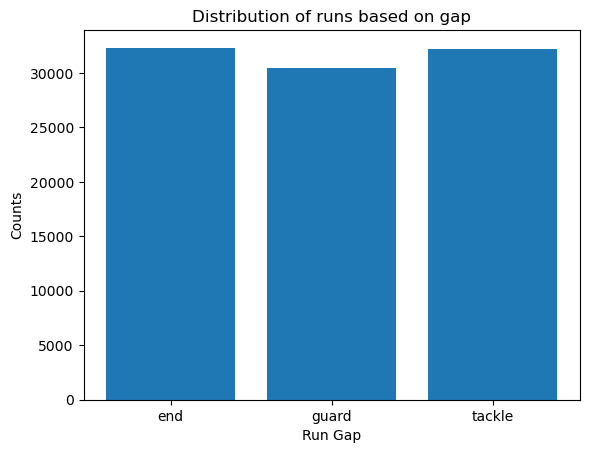

In [32]:
plt.figure()

plt.bar(run_types_df.columns, run_types_df.sum())
plt.ylabel('Counts')
plt.xlabel('Run Gap')
plt.title('Distribution of runs based on gap')


plt.show()

Here we see a pretty consistent distribution of runs across gaps with a slight decrease in interior runs which is to be expected

--------

In [33]:
pass_types_df = end_scores_df1[['left', 'middle','right']]

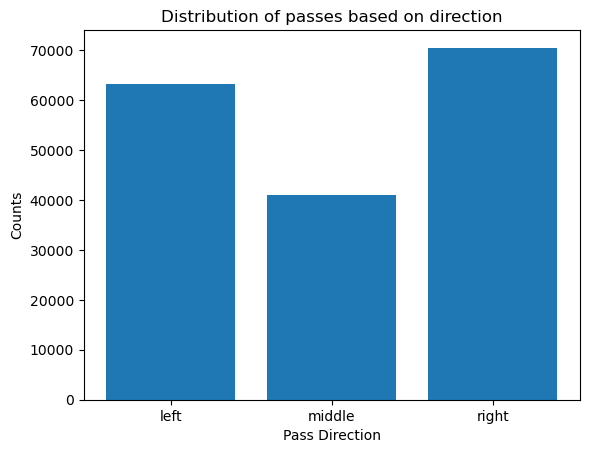

In [34]:
plt.figure()

plt.bar(pass_types_df.columns,pass_types_df.sum())
plt.ylabel('Counts')
plt.xlabel('Pass Direction')
plt.title('Distribution of passes based on direction')

plt.show()

Interestingly we see a pretty substantial decrease in passes towards the middle of the field, especially considering it is the largest area of the field. Clearly teams prefer to target the less cluttered and easier to read sidelines than the middle of the field

------------

### Final Data Cleaning

Now a few final features can be dropped. First the excess one hot encoded features (tackle, right adn punt), next is score tracking features (is_over, home_win, away_win, posteam, winner, home_win, away_win, total_home_score and total_away_score). These will ultimately not be necessary for modeling as they provide no value for models.

In [49]:
grouped_df = end_scores_df1.drop(columns = ['is_over', 'home_team','away_team', 'posteam','winner',
                                            'home_win', 'away_win', 'total_home_score', 'total_away_score','tackle', 'right', 'punt'])

Creating a final data frame to be grouped by game, first dropping a few residual  unnecesary columns not needed for analysis

Also removing a feature of each one hot encoded column to prevent multicollinearity.

In [50]:
grouped_df = grouped_df.groupby(['game_id','winner_play']).sum()

Reducing the dataframe down by games and separated by if the play contributed to a win or a loss, effectively showing us winners stats vs losers stats

In [51]:
grouped_df.unstack('winner_play')
grouped_df

shotgun  no_huddle  qb_dropback  qb_scramble  \
game_id    winner_play                                                 
2009091000 0                 40         14         50.0            1   
           1                 16          0         34.0            0   
2009091300 0                 17          0         38.0            0   
           1                 21          0         33.0            0   
2009091301 0                 21         43         49.0            7   
...                         ...        ...          ...          ...   
2018121610 1                 35          7         37.0            0   
2018121611 0                 47         13         57.0            2   
           1                 56          1         32.0            1   
2018121700 0                 45         11         34.0            2   
           1                 40          0         38.0            0   

                        first_down_rush  first_down_pass  \
game_id    winner_play                                     
2009091000 0                        1.0             19.0   
           1                        2.0             13.0   
2009091300 0                        3.0             15.0   
           1                        4.0             11.0   
2009091301 0                       11.0             20.0   
...                                 ...              ...   
2018121610 1                        7.0              9.0   
2018121611 0                        5.0             18.0   
           1                        7.0              9.0   
2018121700 0                        5.0              7.0   
           1                       11.0              8.0   

                        third_down_converted  third_down_failed  \
game_id    winner_play                                            
2009091000 0                             4.0               10.0   
           1                             4.0                9.0   
2009091300 0                             6.0                8.0   
           1                             4.0                7.0   
2009091301 0                            10.0                7.0   
...                                      ...                ...   
2018121610 1                             3.0                7.0   
2018121611 0                             4.0                8.0   
           1                             4.0                9.0   
2018121700 0                             7.0                8.0   
           1                             4.0                9.0   

                        fourth_down_converted  fourth_down_failed  \
game_id    winner_play                                              
2009091000 0                              0.0                 0.0   
           1                              0.0                 0.0   
2009091300 0                              0.0                 0.0   
           1                              1.0                 0.0   
2009091301 0                              1.0                 0.0   
...                                       ...                 ...   
2018121610 1                              0.0                 1.0   
2018121611 0                              0.0                 1.0   
           1                              0.0                 1.0   
2018121700 0                              1.0                 1.0   
           1                              1.0                 0.0   

                        rush_attempt  pass_attempt  field_goal  pass  run  \
game_id    winner_play                                                      
2009091000 0                    23.0          49.0           1    49   23   
           1                    25.0          34.0           4    34   25   
2009091300 0                    24.0          38.0           4    38   24   
           1                    22.0          34.0           0    33   22   
2009091301 0                    41.0          44.0           2    44   41 

Unstacking final dataframe to make it much easier to work with in the new notebook

# Explaining the new datafame

Now that the dataframe is condensed each individual row is no longer representing a play, but rather the total summed stats from an entire game. The winning team's statistics are marked as a 1 in the winner play column and 0 for the loser. Each game has a winner and loser, leading to 2 rows per game.

During modeling, we will attempt to determine the winners of a game based on these game statistics.

----

### Quickly checking for multicollinearity before saving the dataframe for modeling

In [52]:
corr_matrix = grouped_df.corr()

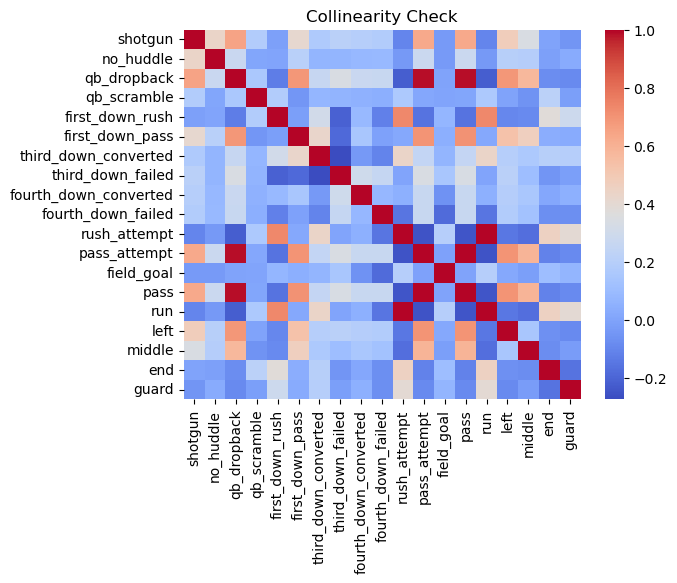

In [53]:
plt.figure()

sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Collinearity Check');

Creating a heatmap to check for collinearity

Uncaught collinearity between a couple redundant features than need to be dropped

In [54]:
grouped_df = grouped_df.drop(columns = ['qb_dropback', 'rush_attempt', 'pass_attempt'])

Dropping redundencies

------

In [55]:
grouped_df.to_csv('Capstone_grouped_df.csv')

Downloading the cleaned dataframe to run from a new notebook to speed up time initializing notebook on every new usage

In [56]:
grouped_df.isna().sum()

shotgun                  0
no_huddle                0
qb_scramble              0
first_down_rush          0
first_down_pass          0
third_down_converted     0
third_down_failed        0
fourth_down_converted    0
fourth_down_failed       0
field_goal               0
pass                     0
run                      0
left                     0
middle                   0
end                      0
guard                    0
dtype: int64

Now that data has been cleaned, a quick check shows all NaN values have been dealt with

## Final Vizualizations of preprocessed data before moving to next workbook.

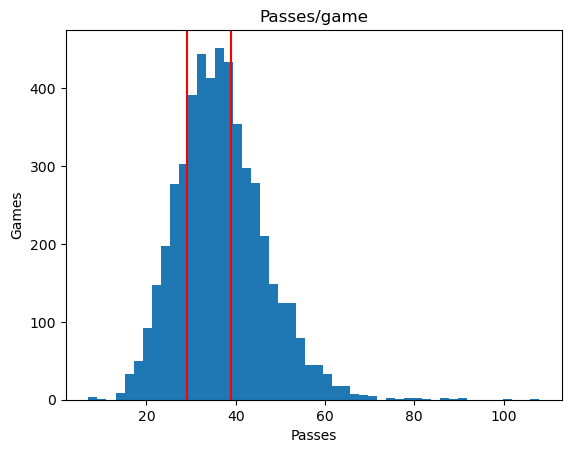

In [57]:
plt.figure()

plt.hist(grouped_df['pass'], bins=50)
plt.axvline(x = 29, color = 'r')
plt.axvline(x = 39, color = 'r')
plt.xlabel('Passes')
plt.ylabel('Games')
plt.title('Passes/game')

plt.show()

Here we see a normal distribution of total pass plays per game with the bulk being in the 30-40 window of total passes per game

----------

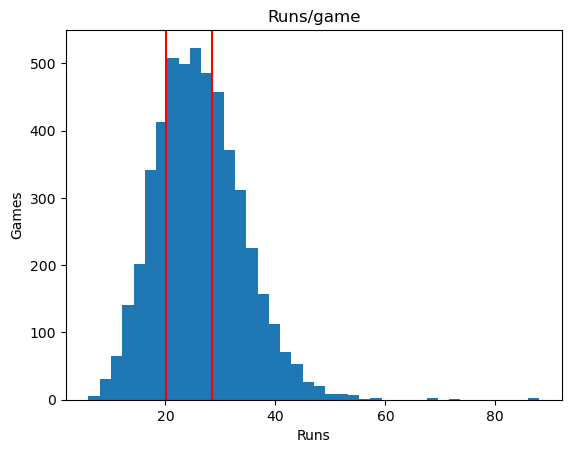

In [58]:
plt.figure()

plt.hist(grouped_df['run'], bins=40)
plt.axvline(x = 20.1, color = 'r')
plt.axvline(x = 28.5, color = 'r')
plt.xlabel('Runs')
plt.ylabel('Games')
plt.title('Runs/game')

plt.show()

Now taking a look at the average number of runs per game, we see highest counts around 10 less than we see for passes.

--------------

In [59]:
pass_vs_run_df = grouped_df[['pass', 'run']]

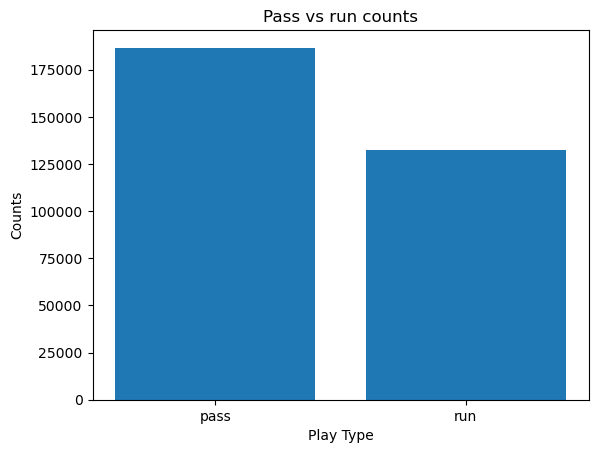

In [60]:
plt.figure()

plt.bar(pass_vs_run_df.columns, pass_vs_run_df.sum())
plt.ylabel('Counts')
plt.xlabel('Play Type')
plt.title('Pass vs run counts')

plt.show()

Here we see a higher pass count than run count as would be expected, further supporting the findinds of the recent graphs.

-----

In [61]:
first_down_df = grouped_df[['first_down_pass', 'first_down_rush']]

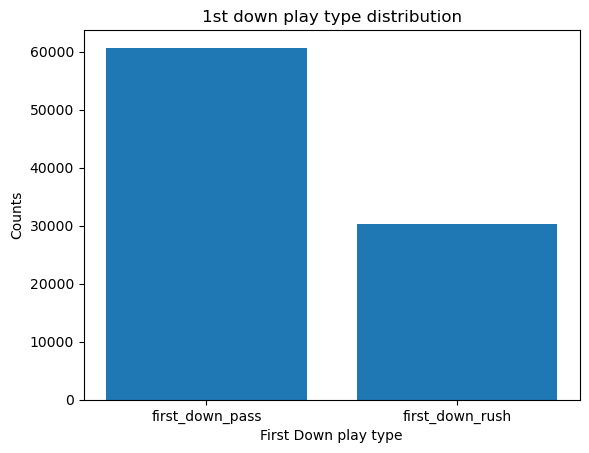

In [62]:
plt.figure()

plt.bar(first_down_df.columns, first_down_df.sum())
plt.ylabel('Counts')
plt.xlabel('First Down play type')
plt.title('1st down play type distribution')

plt.show()

Here we see a much higher pass % on first down which is a bit of a surprise considering 1st down may be the safest down to run the ball in football.

-----

In [63]:
winloss_df = end_scores_df1[['home_win','away_win']]

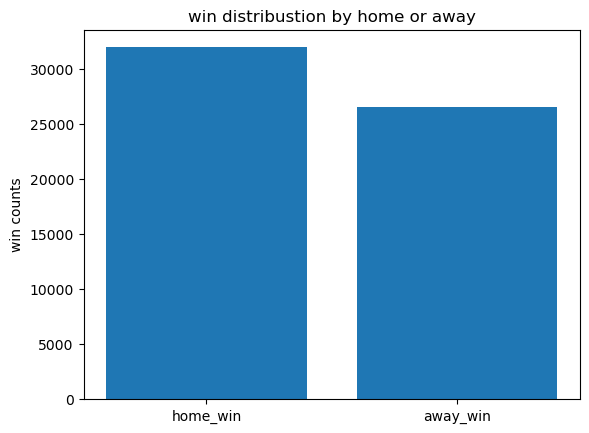

In [64]:
plt.figure()

plt.bar(winloss_df.columns,winloss_df.sum())
plt.ylabel('win counts')
plt.title('win distribustion by home or away')

plt.show()

The home team wins more often than the away team, meaning if there was any doubt home team advantage is a real thing.

This is not worth adding into final calculations, however, since it's something that remains out of a teams control.

-----

### per team statistcal analysis

In [65]:
team_wins = end_scores_df1.groupby('winner')['game_id'].nunique()

In order to assess the finding of the next set of graphs, it is important to have some context. Here I created a dataframe to show how teams preformed by grouping winners with the total unique game ids. This sums up the amount of games each team won.

In [66]:
team_wins

winner
ARI    130
ATL    139
BAL    141
BUF    124
CAR    132
CHI    125
CIN    132
CLE    112
DAL    128
DEN    133
DET    128
GB     143
HOU    128
IND    135
JAC     80
JAX     35
KC     132
LA      36
LAC     26
MIA    127
MIN    139
NE     150
NO     142
NYG    121
NYJ    122
OAK    119
PHI    126
PIT    142
SD     105
SEA    135
SF     129
STL     82
TB     114
TEN    122
WAS    116
Name: game_id, dtype: int64

Here we see there are some strange outliers in the data:

    -JAX, JAC, LA, LAC, SD and STL standout drastically from the rest
    
These numbers are off due to relocation in the case of LA, LAC, SD and STL as the San Diego Chargers and the St. Louis Rams both moved the Los Angeles.


The JAX and JAC case appears to be inconsistency during data entry.

Each of these cases can be solved easily by combining each of the pairs:

    -(SD, LAC)
    -(STL, LA)
    -(JAC, JAX)

In [67]:
team_wins['JAX'] = team_wins['JAX'] + team_wins['JAC']
team_wins['LA'] = team_wins['LA'] + team_wins['STL']
team_wins['LAC'] = team_wins['LAC'] + team_wins['SD']

Here the duplicates (in the total wins dataframe) get combined to make the final charts easier to read

In [68]:
team_wins = (team_wins.drop(index= ['STL', 'SD','JAC']))

Finally dropping the now unnecessary extra rows.

In [69]:
team_wins= team_wins.sort_values(ascending=False)
team_wins

winner
NE     150
GB     143
PIT    142
NO     142
BAL    141
MIN    139
ATL    139
SEA    135
IND    135
DEN    133
KC     132
CAR    132
CIN    132
LAC    131
ARI    130
SF     129
HOU    128
DET    128
DAL    128
MIA    127
PHI    126
CHI    125
BUF    124
TEN    122
NYJ    122
NYG    121
OAK    119
LA     118
WAS    116
JAX    115
TB     114
CLE    112
Name: game_id, dtype: int64

Now we have a complete list of each NFL team's wins during the time period the data was collected, sorted in descending order.

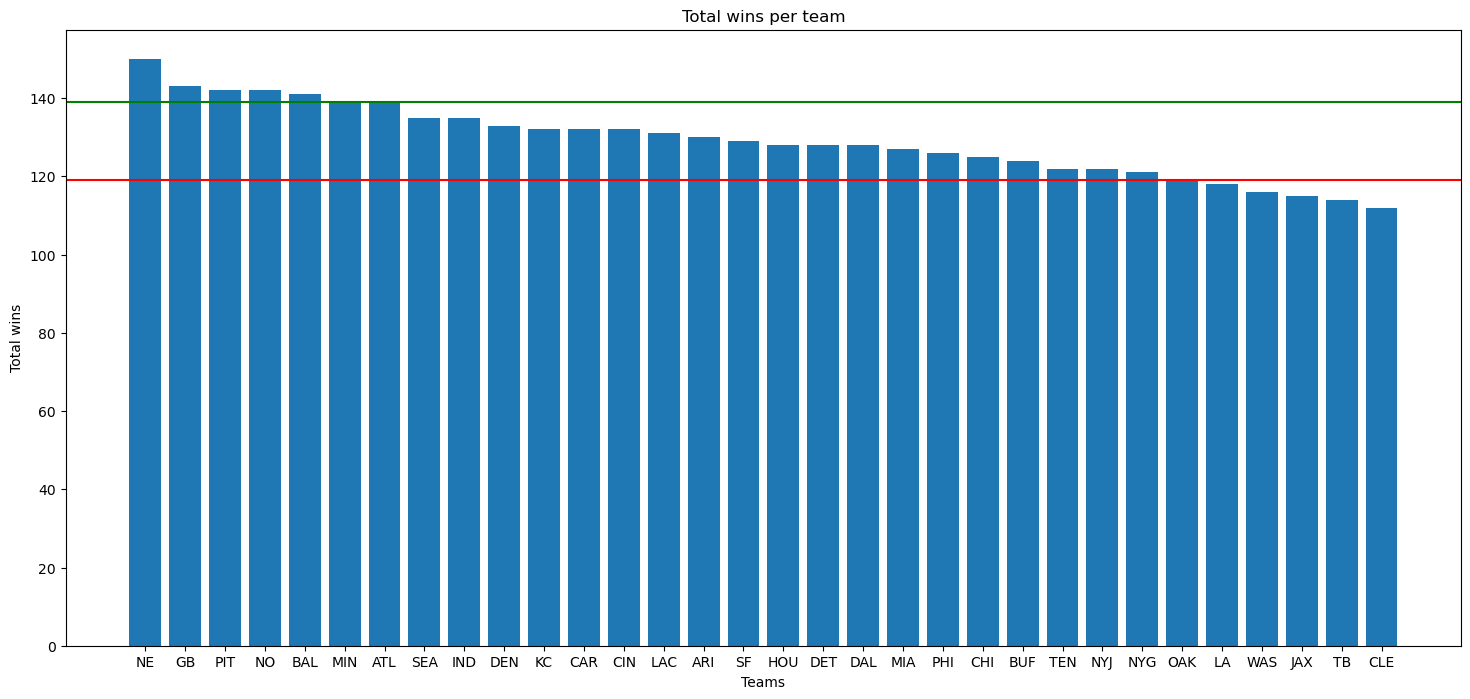

In [70]:
plt.figure(figsize = (18,8))

plt.bar(team_wins.index,team_wins.values)
plt.xlabel('Teams')
plt.ylabel('Total wins')
plt.title('Total wins per team')
plt.axhline(139, c='g')
plt.axhline(119,c = 'r')

plt.show()

This graph shows the total wins of each team making it easy to distinguish the most and least winningest teams from the rest of the pack.

The most winning teams in the timeframe the data was collected appear to be:

    -NE, GB, PIT, NO, BAL, MIN, and ATL

The bottom teams are:

    -CLE, TB, JAX, WAS, LA and OAK

--------

#### Now viewing other stats now that we know which teams were the most successful

In [71]:
team_x_team = end_scores_df1.groupby('posteam')['pass'].sum()

Most of the initial steps in each dataframe will be the same, in this case each team in possession of the ball is getting grouped with a pass attempt. (The pass column is a binary column making this sum the total number of passes)

In [72]:
team_x_team

posteam
ARI    6113
ATL    6221
BAL    5996
BUF    5390
CAR    5395
CHI    5582
CIN    5623
CLE    5845
DAL    5742
DEN    5991
DET    6564
GB     6054
HOU    5782
IND    6254
JAC    4170
JAX    1735
KC     5478
LA     1715
LAC    1105
MIA    5752
MIN    5610
NE     6167
NO     6449
NYG    5949
NYJ    5428
OAK    5863
PHI    6126
PIT    6025
SD     4794
SEA    5339
SF     5360
STL    3972
TB     5846
TEN    5398
WAS    5844
Name: pass, dtype: uint64

In [73]:
team_x_team['JAX'] = team_x_team['JAX'] + team_x_team['JAC']
team_x_team['LA'] = team_x_team['LA'] + team_x_team['STL']
team_x_team['LAC'] = team_x_team['LAC'] + team_x_team['SD']

In [74]:
team_x_team

posteam
ARI    6113
ATL    6221
BAL    5996
BUF    5390
CAR    5395
CHI    5582
CIN    5623
CLE    5845
DAL    5742
DEN    5991
DET    6564
GB     6054
HOU    5782
IND    6254
JAC    4170
JAX    5905
KC     5478
LA     5687
LAC    5899
MIA    5752
MIN    5610
NE     6167
NO     6449
NYG    5949
NYJ    5428
OAK    5863
PHI    6126
PIT    6025
SD     4794
SEA    5339
SF     5360
STL    3972
TB     5846
TEN    5398
WAS    5844
Name: pass, dtype: uint64

In [75]:
team_x_team = team_x_team.drop(index= ['STL', 'SD','JAC'])

---------

Now that I have the total passing numbers, I want to get a chart that shows passes/game. To do this I first need to get the total games played for each team. This again will follow similar steps of creating a new dataframe with a group by, combining the flawed entries and dropping the waste.

In [76]:
team_games = end_scores_df1.groupby('posteam')['game_id'].nunique()

Here we get the counts of each teams total games played by grouping on unique game ids and set it in a new dataframe.

In [77]:
team_games

posteam
ARI    158
ATL    158
BAL    158
BUF    158
CAR    158
CHI    158
CIN    158
CLE    157
DAL    158
DEN    158
DET    158
GB     158
HOU    158
IND    158
JAC    113
JAX     45
KC     158
LA      46
LAC     30
MIA    158
MIN    158
NE     158
NO     158
NYG    156
NYJ    158
OAK    158
PHI    158
PIT    158
SD     128
SEA    158
SF     158
STL    112
TB     158
TEN    158
WAS    157
Name: game_id, dtype: int64

In [78]:
team_games['JAX'] = team_games['JAX'] + team_games['JAC']
team_games['LA'] = team_games['LA'] + team_games['STL']
team_games['LAC'] = team_games['LAC'] + team_games['SD']

In [79]:
team_games = (team_games.drop(index= ['STL', 'SD','JAC']))

In [80]:
team_games

posteam
ARI    158
ATL    158
BAL    158
BUF    158
CAR    158
CHI    158
CIN    158
CLE    157
DAL    158
DEN    158
DET    158
GB     158
HOU    158
IND    158
JAX    158
KC     158
LA     158
LAC    158
MIA    158
MIN    158
NE     158
NO     158
NYG    156
NYJ    158
OAK    158
PHI    158
PIT    158
SEA    158
SF     158
TB     158
TEN    158
WAS    157
Name: game_id, dtype: int64

--------------

Now that I have total game counts, I can combine the two newly created dataframes on the index of teams making it very easy to preform mathmatical computations. Which in this case is just the average.

In [81]:
teams_merged = pd.merge(team_x_team,team_games, on='posteam')

In [82]:
teams_merged

,pass,game_id
posteam,,
ARI,6113,158
ATL,6221,158
BAL,5996,158
BUF,5390,158
CAR,5395,158
CHI,5582,158
CIN,5623,158
CLE,5845,157
DAL,5742,158


In [83]:
teams_merged['avg_passes'] = teams_merged['pass']/teams_merged['game_id']

Now finally creating a new column in this final dataframe that shows the average number of pass attempts per game by team

In [84]:
np.mean(teams_merged['avg_passes'])

36.951685415361666

A quick check for the average of this newly created column to provide a perfect measurement for the final chart

------

The next few lines of code will create 3 new dataframes. This is for visualization interpretability. By separating the data into the winningest, losingest and average teams I can color code the chart very easily.

In [85]:
winners_passes = teams_merged.drop(index = ['WAS', 'TEN', 'TB', 'SF', 'PHI', 'OAK', 'NYJ', 'NYG', 
                                            'MIA', 'LAC', 'LA', 'KC', 'JAX', 'HOU', 'DET', 'DEN', 
                                            'DAL', 'CLE', 'CIN', 'CHI', 'CAR', 'BUF', 'ARI','SEA', 'IND'])

In [86]:
losers_passes =  teams_merged.drop(index = ['SEA', 'TEN', 'NO', 'SF', 'PHI', 'GB', 'NYJ', 'NYG', 
                                            'MIA', 'LAC', 'IND', 'KC', 'NE', 'HOU', 'DET', 'DEN', 
                                            'DAL', 'MIN', 'CIN', 'CHI', 'CAR', 'BUF', 'ARI', 'ATL','BAL','PIT'])

In [87]:
the_rest = teams_merged.drop(index = ['NE', 'MIN', 'NO', 'IND', 'ATL', 'GB', 'PIT', 'CLE',
                                      'OAK', 'TB', 'JAX' ,'WAS', 'LA', 'BAL'])

--------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


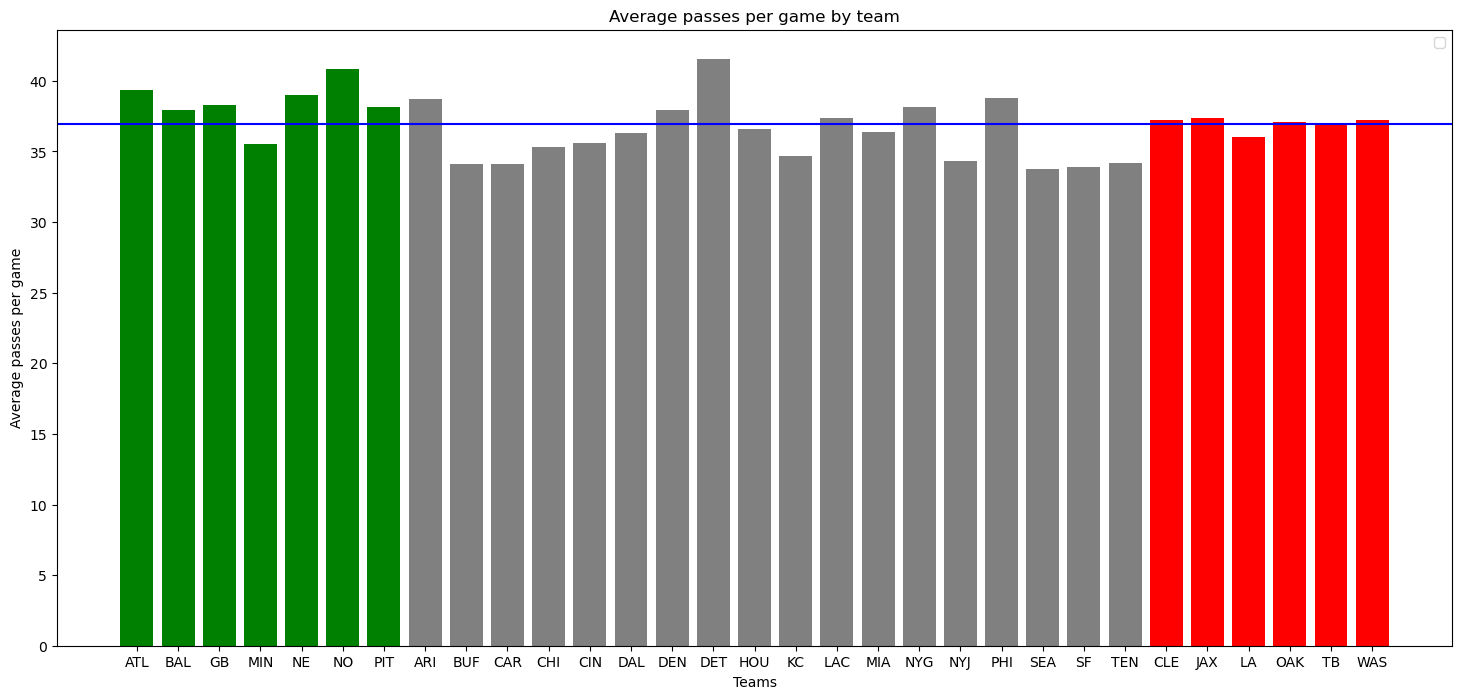

In [88]:
plt.figure(figsize = (18,8))

plt.bar(winners_passes.index,winners_passes['avg_passes'], color = 'green')
plt.bar(the_rest.index,the_rest['avg_passes'], color='grey')
plt.bar(losers_passes.index,losers_passes['avg_passes'], color='red')

plt.xlabel('Teams')
plt.ylabel('Average passes per game')
plt.title('Average passes per game by team')
plt.axhline(36.951, c='b')
plt.legend()

plt.show()

Looking at this data knowing the top and bottom  teams, it's clear that the top teams almost all average more passes per game than average where the bottom teams are around the average or less. This implies that pass attempts may be indicative of winning.

-----------


#### Repeating the same process but checking for runs

In [89]:
team_runs = end_scores_df1.groupby('posteam')['run'].sum()

In [90]:
team_runs['JAX'] = team_runs['JAX'] + team_runs['JAC']
team_runs['LA'] = team_runs['LA'] + team_runs['STL']
team_runs['LAC'] = team_runs['LAC'] + team_runs['SD']

In [91]:
teams_runs_merged = pd.merge(team_runs,team_games, on='posteam')

In [92]:
teams_runs_merged['avg_run'] = teams_runs_merged['run']/teams_runs_merged['game_id']

In [93]:
winners_runs = teams_runs_merged.drop(index = ['WAS', 'TEN', 'TB', 'SF', 'PHI', 'OAK', 'NYJ', 'NYG', 
                                            'MIA', 'LAC', 'LA', 'KC', 'JAX', 'HOU', 'DET', 'DEN', 
                                            'DAL', 'CLE', 'CIN', 'CHI', 'CAR', 'BUF', 'ARI','SEA', 'IND'])

In [94]:
losers_runs =  teams_runs_merged.drop(index = ['SEA', 'TEN', 'NO', 'SF', 'PHI', 'GB', 'NYJ', 'NYG', 
                                            'MIA', 'LAC', 'IND', 'KC', 'NE', 'HOU', 'DET', 'DEN', 
                                            'DAL', 'MIN', 'CIN', 'CHI', 'CAR', 'BUF', 'ARI', 'ATL','BAL','PIT'])

In [95]:
the_runs = teams_runs_merged.drop(index = ['NE', 'MIN', 'NO', 'IND', 'ATL', 'GB', 'PIT', 'CLE', 'OAK', 'TB', 'JAX' ,'WAS', 'LA', 'BAL'])

In [96]:
np.mean(teams_runs_merged['avg_run'])

26.26449436731601

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


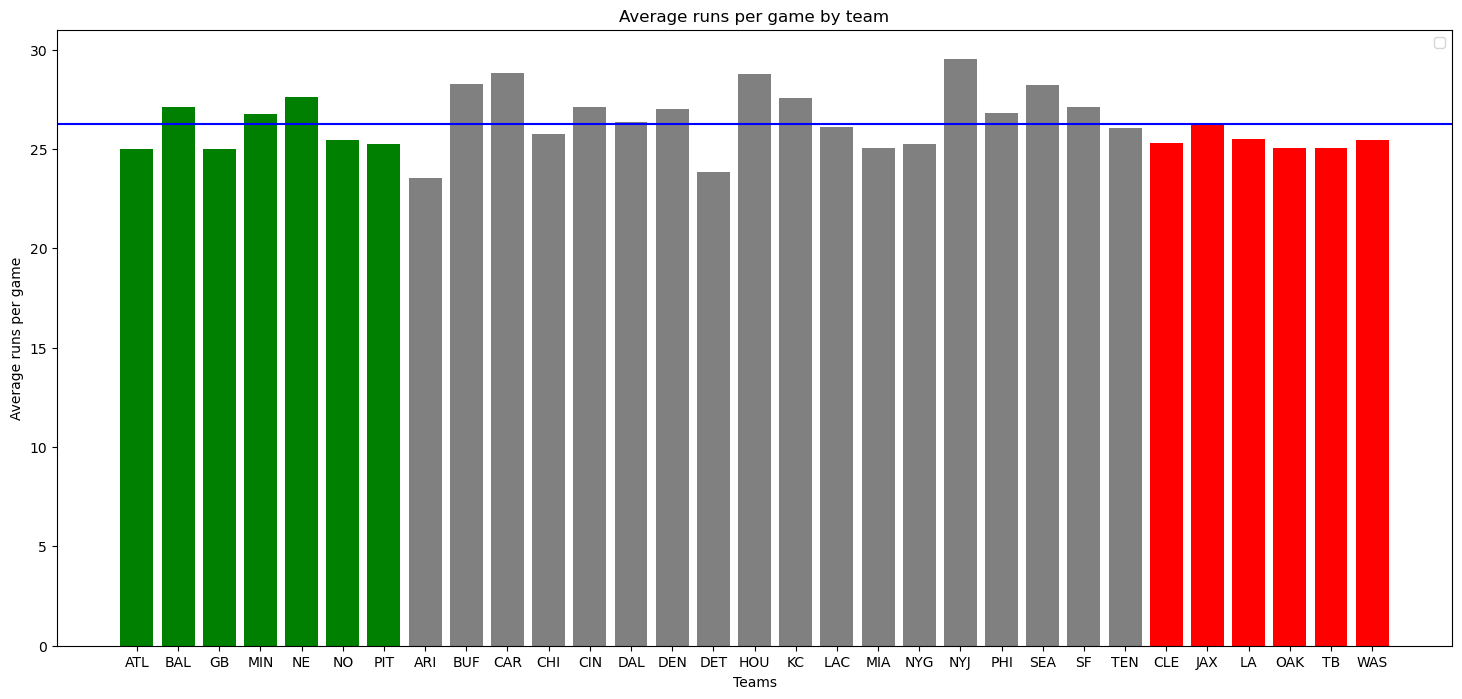

In [97]:
plt.figure(figsize = (18,8))

plt.bar(winners_runs.index,winners_runs['avg_run'], color = 'green')
plt.bar(the_runs.index,the_runs['avg_run'], color='grey')
plt.bar(losers_runs.index,losers_runs['avg_run'], color='red')

plt.xlabel('Teams')
plt.ylabel('Average runs per game')
plt.title('Average runs per game by team')
plt.axhline(26.264, c='blue')
plt.legend()

plt.show()

Interestingly enough average runs per game are far less clear indicative than passes were.

---------

After seeing that total pass attempts may be indicative of success but runs were far less so, I wanted to see if this might be due to extra plays. Since there are only two primary playtypes in football (run and pass) this discrepancy may be found in extra plays.

The hypothesis being that teams which are more successful remain on offense more and because of the fact teams tend to call more passes than runs, which we've already seen, the reason for this increase from the winning teams was mostly from an increased number of plays.

In [98]:
team_plays = end_scores_df1.groupby('posteam')['posteam'].count()

Now grouping teams by the total counts they appear in a play with possession of the ball, giving us their total plays.

In [99]:
team_plays

posteam
ARI    12280
ATL    12346
BAL    12766
BUF    12223
CAR    12240
CHI    12024
CIN    12279
CLE    12224
DAL    12242
DEN    12640
DET    12618
GB     12387
HOU    12693
IND    12469
JAC     8679
JAX     3696
KC     12356
LA      3605
LAC     2333
MIA    12021
MIN    12103
NE     12885
NO     12665
NYG    12180
NYJ    12478
OAK    12387
PHI    12722
PIT    12378
SD     10038
SEA    12220
SF     12165
STL     8558
TB     12167
TEN    11823
WAS    12233
Name: posteam, dtype: int64

In [100]:
team_plays['JAX'] = team_plays['JAX'] + team_plays['JAC']
team_plays['LA'] = team_plays['LA'] + team_plays['STL']
team_plays['LAC'] = team_plays['LAC'] + team_plays['SD']

In [101]:
team_plays = (team_plays.drop(index= ['STL', 'SD','JAC']))

In [102]:
team_plays

posteam
ARI    12280
ATL    12346
BAL    12766
BUF    12223
CAR    12240
CHI    12024
CIN    12279
CLE    12224
DAL    12242
DEN    12640
DET    12618
GB     12387
HOU    12693
IND    12469
JAX    12375
KC     12356
LA     12163
LAC    12371
MIA    12021
MIN    12103
NE     12885
NO     12665
NYG    12180
NYJ    12478
OAK    12387
PHI    12722
PIT    12378
SEA    12220
SF     12165
TB     12167
TEN    11823
WAS    12233
Name: posteam, dtype: int64

In [103]:
np.mean(team_plays)

12347.59375

In [104]:
winners_plays = team_plays.drop(index = ['WAS', 'TEN', 'TB', 'SF', 'PHI', 'OAK', 'NYJ', 'NYG', 
                                            'MIA', 'LAC', 'LA', 'KC', 'JAX', 'HOU', 'DET', 'DEN', 
                                            'DAL', 'CLE', 'CIN', 'CHI', 'CAR', 'BUF', 'ARI','SEA', 'IND'])

In [105]:
losers_plays =  team_plays.drop(index = ['SEA', 'TEN', 'NO', 'SF', 'PHI', 'GB', 'NYJ', 'NYG', 
                                            'MIA', 'LAC', 'IND', 'KC', 'NE', 'HOU', 'DET', 'DEN', 
                                            'DAL', 'MIN', 'CIN', 'CHI', 'CAR', 'BUF', 'ARI', 'ATL','BAL','PIT'])

In [106]:
the_plays = team_plays.drop(index = ['NE', 'MIN', 'NO', 'IND', 'ATL', 'GB', 'PIT', 'CLE', 'OAK', 'TB', 'JAX' ,'WAS', 'LA', 'BAL'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


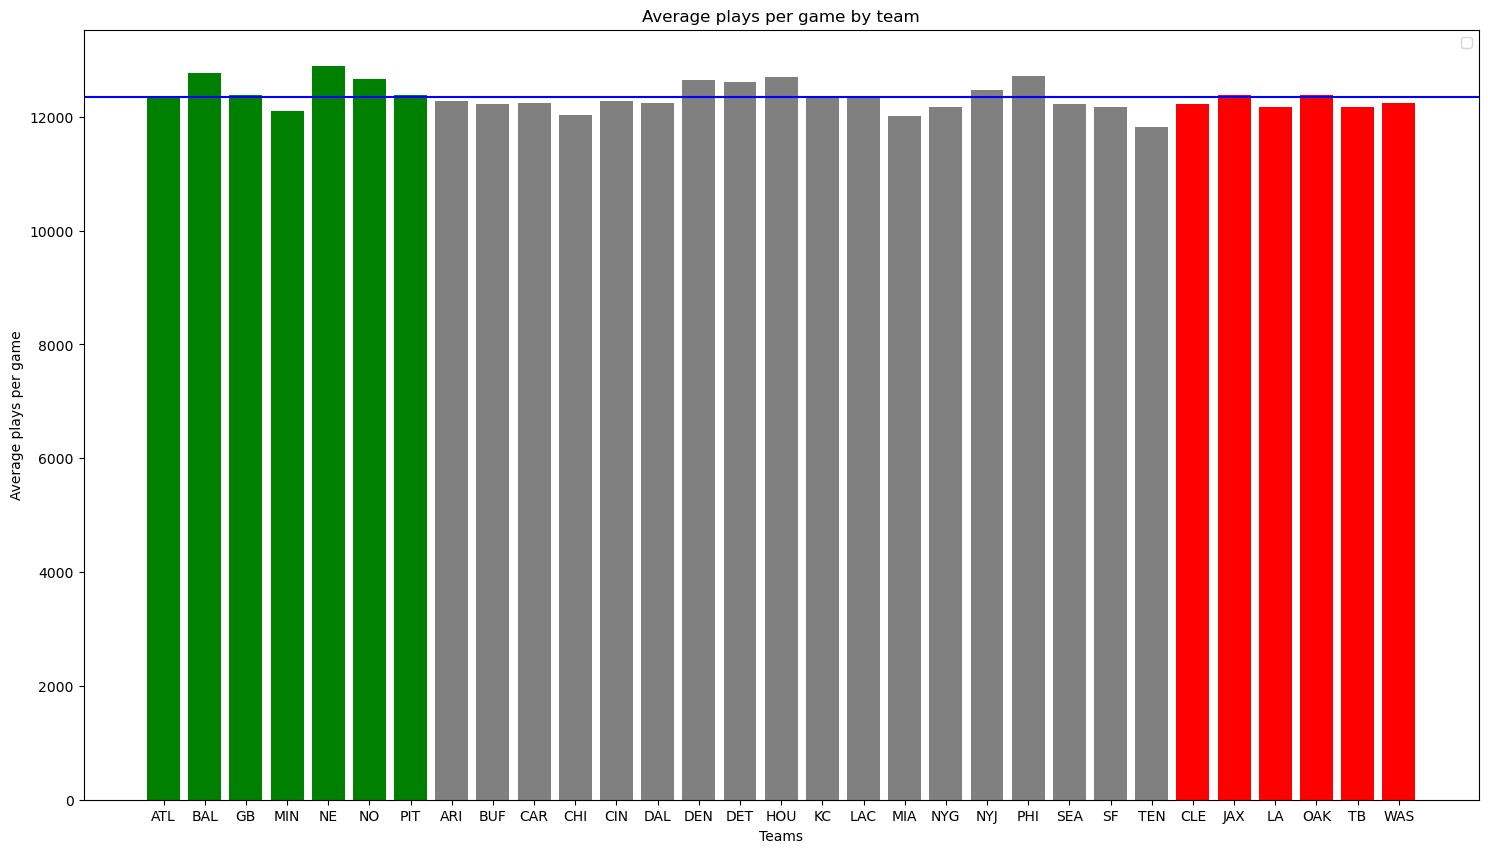

In [107]:
plt.figure(figsize = (18,10))

plt.bar(winners_plays.index,winners_plays.values, color = 'green')
plt.bar(the_plays.index,the_plays.values, color='grey')
plt.bar(losers_plays.index,losers_plays.values, color='red')

plt.xlabel('Teams')
plt.ylabel('Average plays per game')
plt.title('Average plays per game by team')
plt.axhline(12347.59375, c='blue')
plt.legend()

plt.show()

After viewing the results, there may be some indication that the hypothesis is correct, however, nothing valid enough to confirm it. We do see 7 teams cross the mean with any significance at all and 6 of these teams all were above the average in terms of pass attempts per game. This implies some correlation potentially, however, as previously mentioned the data shown isn't enough to confirm the hypothesis.

#### Final check for class balance

In [108]:
team_outcomes = end_scores_df1.groupby('winner_play')['game_id'].nunique()

In [109]:
team_outcomes

winner_play
0    2526
1    2526
Name: game_id, dtype: int64

To simply check for a class balance on the target variable 'winner_play', I've grouped all unique game id's with the winner play column and here we see a perfect 50/50 meaning a perfect class balance.